In [1]:
# import libraries
import matplotlib.image as npin
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import numpy as np
from sklearn.decomposition import PCA
from PIL import Image

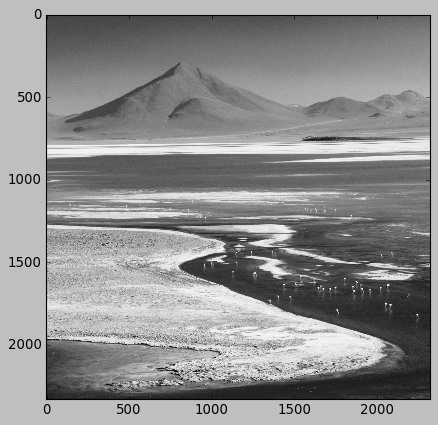

(2325, 2325)

In [2]:
# Grayscaled Image

plt.style.use('classic')
img = Image.open('Bolivia Landscape.jpg')

#convert image to grayscale
imggray = img.convert('LA')

# convert to numpay array
imgmat = np.array(list(imggray.getdata(band=0)),float)

#Reshape according to original image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat,cmap='gray')
plt.show()

imgmat.shape

In [3]:
def pca_gs(imggray, vals):
    imgmat = np.array(list(imggray.getdata(band=0)),float)
    imgmat.shape = (imggray.size[1],imggray.size[0])
    cov_mat = imgmat - np.mean(imgmat , axis=1)
    eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat))  
    p = np.size(eig_vec,axis=1)
    idx = np.argsort(eig_val)
    idx = idx[::-1]
    eig_vec = eig_vec[:,idx]
    eig_val = eig_val[idx]
    if vals <p or vals >0:
        eig_vec = eig_vec[:,range(vals)]
    score = np.dot(eig_vec.T, cov_mat)
    recon = np.dot(eig_vec ,score) + np.mean(imgmat,axis=1).T
    return recon

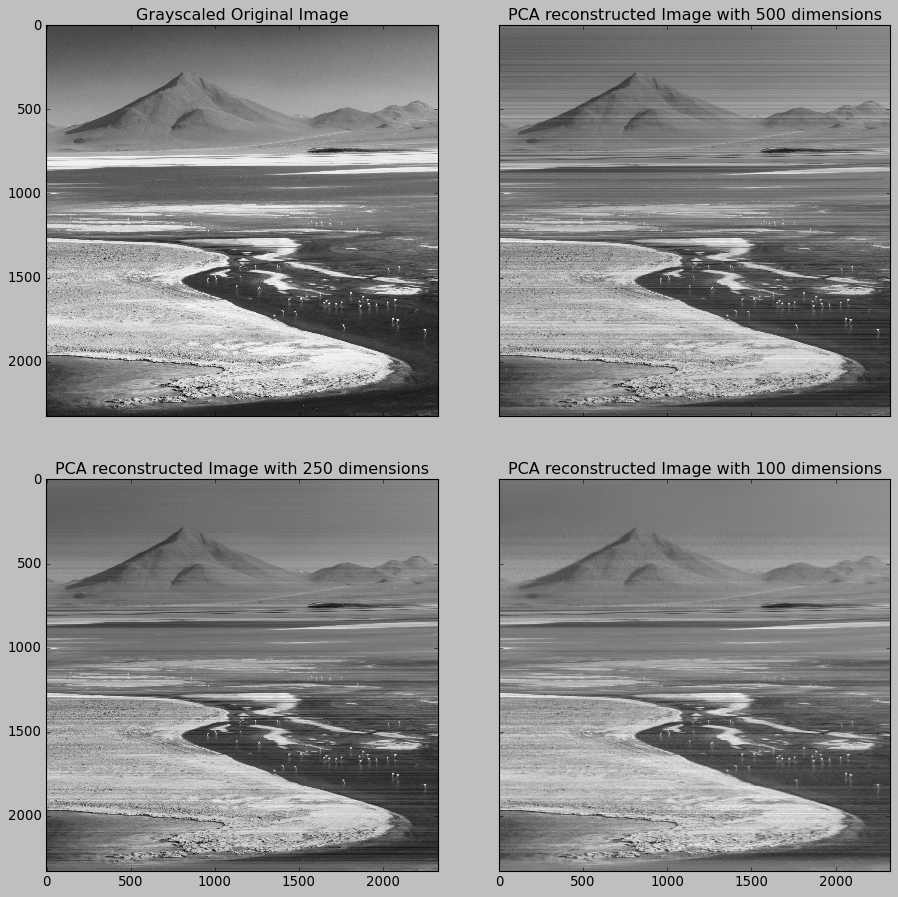

In [4]:
# usage for pca

Mhat1 = pca_gs(imggray, 500)
Mhat2 = pca_gs(imggray, 250)
Mhat3 = pca_gs(imggray, 100)



fig, ax = plt.subplots(2, 2, sharex = 'col', sharey = 'row', figsize=(12,12))
fig.tight_layout(pad = 3.0)
ax[0,0].set_title("Grayscaled Original Image")
ax[0,0].imshow(imggray)

ax[0,1].set_title("PCA reconstructed Image with 500 dimensions")
ax[0,1].imshow(Mhat1,cmap=plt.get_cmap('gray'))

ax[1,0].set_title("PCA reconstructed Image with 250 dimensions")
ax[1,0].imshow(Mhat2,cmap=plt.get_cmap('gray'))

ax[1,1].set_title("PCA reconstructed Image with 100 dimensions")
ax[1,1].imshow(Mhat3,cmap=plt.get_cmap('gray'))

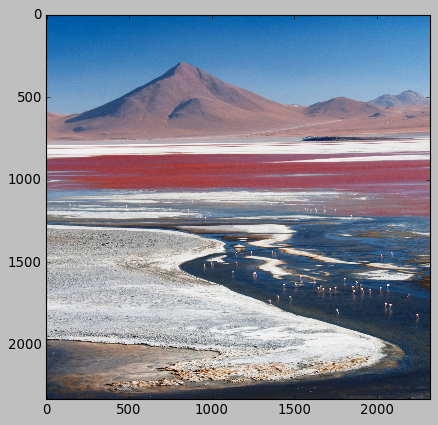

In [5]:
# Color Image

Color_imgmat = np.array(list(img.getdata()),int)
Color_imgmat.shape = (img.size[1], img.size[0], 3)

plt.figure(figsize=(9,6))
plt.imshow((Color_imgmat))
plt.show()

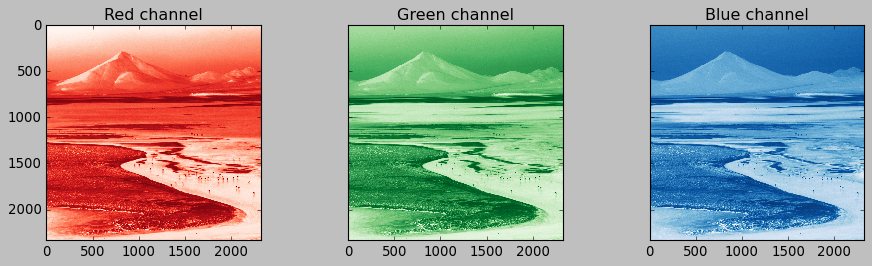

In [6]:
red = Color_imgmat[:,:,0]
green = Color_imgmat[:,:,1]
blue = Color_imgmat[:,:,2]

fig, ax_c = plt.subplots(1, 3, sharex = 'col', sharey = 'row', figsize=(12,4))
fig.tight_layout(pad = 3.0)

ax_c[0].set_title('Red channel')
ax_c[0].imshow(red, cmap = 'Reds')

ax_c[1].set_title('Green channel')
ax_c[1].imshow(green, cmap = 'Greens')

ax_c[2].set_title('Blue channel')
ax_c[2].imshow(blue, cmap = 'Blues')

In [7]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [8]:
# using function

def pca_reconstruction_color(df, vals):
    cov_mat = df - np.mean(df , axis=1)
    eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat))   
    p = np.size(eig_vec,axis=1)
    idx = np.argsort(eig_val)
    idx = idx[::-1]
    eig_vec = eig_vec[:,idx]
    eig_val = eig_val[idx]
    if vals <p or vals >0:
        eig_vec = eig_vec[:,range(vals)]
    score = np.dot(eig_vec.T, cov_mat)
    recon = np.dot(eig_vec ,score) + np.mean(df,axis=1).T 
    return recon

In [9]:
def pca_rgb(df_red, df_green, df_blue, vals):
    r_arr_reduced = pca_reconstruction_color(df_red, vals)
    g_arr_reduced = pca_reconstruction_color(df_green, vals)
    b_arr_reduced = pca_reconstruction_color(df_blue, vals)
    print(r_arr_reduced.shape, g_arr_reduced.shape, b_arr_reduced.shape)
    
    img_recon_reduced = np.dstack((r_arr_reduced,g_arr_reduced,b_arr_reduced))
    print(img_recon_reduced.shape)
    return img_recon_reduced

(2325, 2325) (2325, 2325) (2325, 2325)
(2325, 2325, 3)
(2325, 2325) (2325, 2325) (2325, 2325)
(2325, 2325, 3)
(2325, 2325) (2325, 2325) (2325, 2325)
(2325, 2325, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


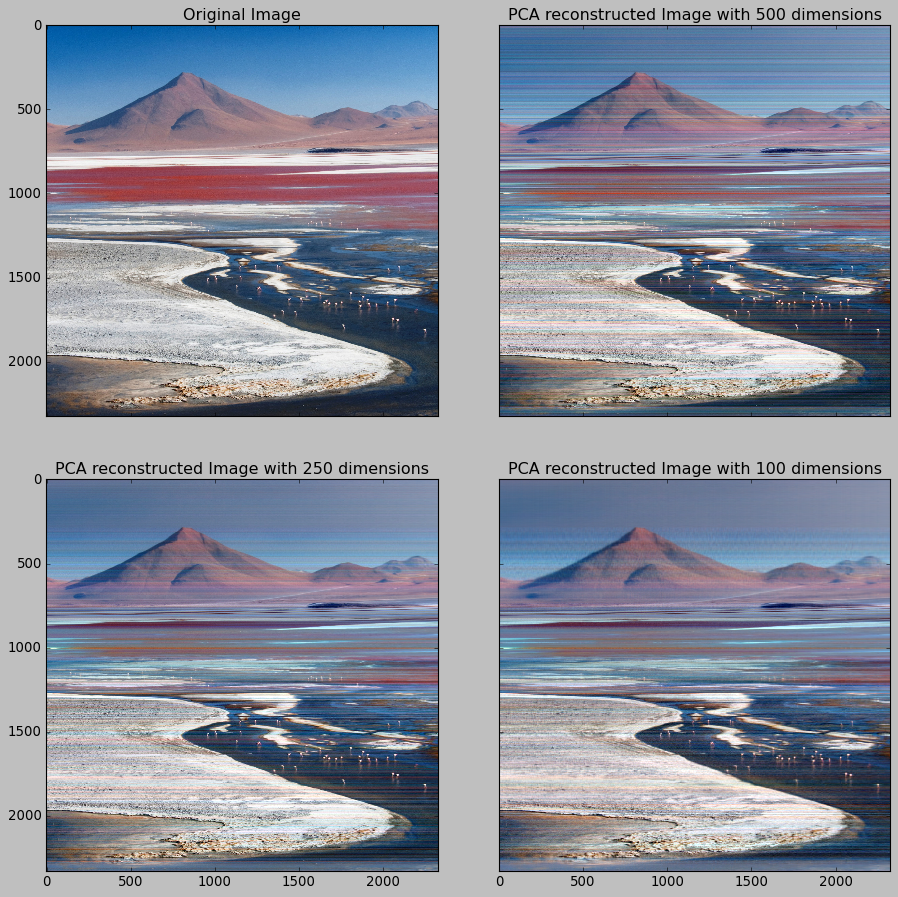

In [10]:
img_recon1 = pca_rgb(df_red, df_green, df_blue, 500)
img_recon2 = pca_rgb(df_red, df_green, df_blue, 250)
img_recon3 = pca_rgb(df_red, df_green, df_blue, 100)

fig, ax = plt.subplots(2, 2, sharex = 'col', sharey = 'row', figsize=(12,12))
fig.tight_layout(pad = 3.0)
ax[0,0].set_title("Original Image")
ax[0,0].imshow(img)

ax[0,1].set_title("PCA reconstructed Image with 500 dimensions")
ax[0,1].imshow(img_recon1)

ax[1,0].set_title("PCA reconstructed Image with 250 dimensions")
ax[1,0].imshow(img_recon2)

ax[1,1].set_title("PCA reconstructed Image with 100 dimensions")
ax[1,1].imshow(img_recon3)

In [13]:
# Using scikit learn
pca_r = PCA(n_components=500)
pca_r.fit(df_red)
recon_r = pca_r.transform(df_red)
pca_g = PCA(n_components=500)
pca_g.fit(df_green)
recon_g = pca_g.transform(df_green)
pca_b = PCA(n_components=500)
pca_b.fit(df_blue)
recon_b = pca_b.transform(df_blue)
print(recon_r.shape)
print(recon_g.shape)
print(recon_b.shape)
r_arr = pca_r.inverse_transform(recon_r)
g_arr = pca_g.inverse_transform(recon_g)
b_arr = pca_b.inverse_transform(recon_b)
print(r_arr.shape, g_arr.shape, b_arr.shape)
img_recon1 = np.dstack((r_arr,g_arr,b_arr))
print(img_recon1.shape)
print("Red Channel  :",sum(pca_r.explained_variance_ratio_))
print("Green Channel:",sum(pca_g.explained_variance_ratio_))
print("Blue Channel :",sum(pca_b.explained_variance_ratio_))

pca_r = PCA(n_components=250)
pca_r.fit(df_red)
recon_r = pca_r.transform(df_red)
pca_g = PCA(n_components=250)
pca_g.fit(df_green)
recon_g = pca_g.transform(df_green)
pca_b = PCA(n_components=250)
pca_b.fit(df_blue)
recon_b = pca_b.transform(df_blue)
print(recon_r.shape)
print(recon_g.shape)
print(recon_b.shape)
r_arr = pca_r.inverse_transform(recon_r)
g_arr = pca_g.inverse_transform(recon_g)
b_arr = pca_b.inverse_transform(recon_b)
print(r_arr.shape, g_arr.shape, b_arr.shape)
img_recon2 = np.dstack((r_arr,g_arr,b_arr))
print(img_recon2.shape)
print("Red Channel  :",sum(pca_r.explained_variance_ratio_))
print("Green Channel:",sum(pca_g.explained_variance_ratio_))
print("Blue Channel :",sum(pca_b.explained_variance_ratio_))

pca_r = PCA(n_components=100)
pca_r.fit(df_red)
recon_r = pca_r.transform(df_red)
pca_g = PCA(n_components=100)
pca_g.fit(df_green)
recon_g = pca_g.transform(df_green)
pca_b = PCA(n_components=100)
pca_b.fit(df_blue)
recon_b = pca_b.transform(df_blue)
print(recon_r.shape)
print(recon_g.shape)
print(recon_b.shape)
r_arr = pca_r.inverse_transform(recon_r)
g_arr = pca_g.inverse_transform(recon_g)
b_arr = pca_b.inverse_transform(recon_b)
print(r_arr.shape, g_arr.shape, b_arr.shape)
img_recon3 = np.dstack((r_arr,g_arr,b_arr))
print(img_recon3.shape)
print("Red Channel  :",sum(pca_r.explained_variance_ratio_))
print("Green Channel:",sum(pca_g.explained_variance_ratio_))
print("Blue Channel :",sum(pca_b.explained_variance_ratio_))

(2325, 500)
(2325, 500)
(2325, 500)
(2325, 2325) (2325, 2325) (2325, 2325)
(2325, 2325, 3)
Red Channel  : 0.9987078278138191
Green Channel: 0.9981495335180115
Blue Channel : 0.9980114037752432
(2325, 250)
(2325, 250)
(2325, 250)
(2325, 2325) (2325, 2325) (2325, 2325)
(2325, 2325, 3)
Red Channel  : 0.99583900939991
Green Channel: 0.9940825382116903
Blue Channel : 0.9936686721597886
(2325, 100)
(2325, 100)
(2325, 100)
(2325, 2325) (2325, 2325) (2325, 2325)
(2325, 2325, 3)
Red Channel  : 0.9854933816804068
Green Channel: 0.9795225334905042
Blue Channel : 0.9782457297596583


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


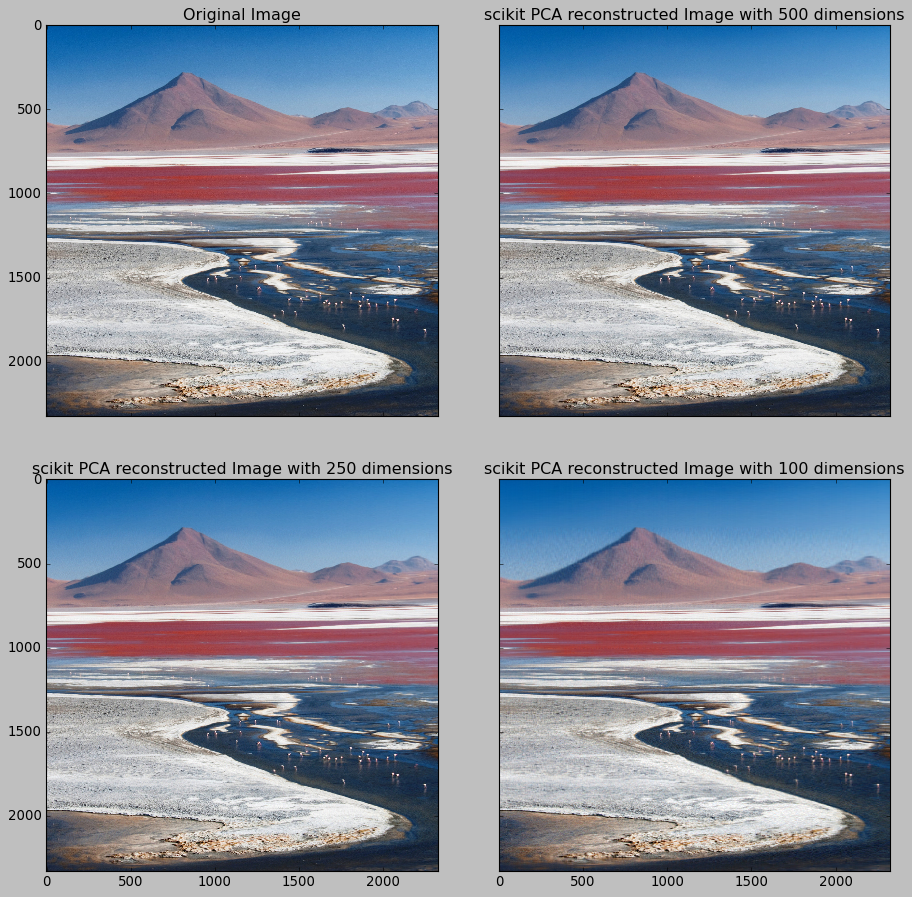

In [14]:
fig, ax = plt.subplots(2, 2, sharex = 'col', sharey = 'row', figsize=(12,12))
fig.tight_layout(pad = 3.0)
ax[0,0].set_title("Original Image")
ax[0,0].imshow(img)

ax[0,1].set_title("scikit PCA reconstructed Image with 500 dimensions")
ax[0,1].imshow(img_recon1)

ax[1,0].set_title("scikit PCA reconstructed Image with 250 dimensions")
ax[1,0].imshow(img_recon2)

ax[1,1].set_title("scikit PCA reconstructed Image with 100 dimensions")
ax[1,1].imshow(img_recon3)